# RCP Simulations


## 1. Loading Dataset & Model

Here we perform some simulation using the Representative Concentration Pathways (RCP) datasets, which include emissions _projections_ (not emissions) which assume variouse mitigating factors for all major anthropogenic greenhouse gases from $1765$ to $2500$. We only consider CO2 emissions for fossil, industrial, and land use-related emissions in the $4$ RCP scenario and its mean. We refer the reader to Meinshausen et al., [The RCP greenhouse gas concentrations and their extensions from 1765 to 2300](https://link.springer.com/article/10.1007/s10584-011-0156-z) for further details. See `data/source/EmiAndConcData` for the full source dataset and `data/emissions` for the cleaned-up snippet of the dataset that is used for our experiment only.

We load the calibrated model, which has been trained in `\solver` and saved in `\results`. The model equilibrium masses, $\mathbf{m}^{eq}$, have been calibrated to the pre-industrial year which assume to correspond to RCP dataset starting year of $1765$


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import copy
import pickle

import lib_operations as operations
import lib_data_load as data_load
from lib_models import model_3sr,model_4pr

def make_plot(n,m,s=[1,1]):
    if n==1:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.8*s[1]),squeeze=False,layout='tight')
    else:
        return plt.subplots(n,m,figsize=(m*4*s[0],n*2.6*s[1]),squeeze=False,layout='tight')
        
np.set_printoptions(suppress=True)
plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

_conditions='PI'

# Load data


In [11]:
with open('result/analysis_'+_conditions+'.pkl', "rb") as handle:
    _results = pickle.load(handle)
_model_set = [model_3sr,model_4pr]

operations.tabulate( _results, title='results'+_conditions, vars=['a','m_eq','time_scale','err_l2_50','err_l2_125','err_l2_250','err_l2_500','diff_o_l','c'])

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                      resultsPI                                                                                                                       |
+-------+----------------+------------------------+---------------------------------+-------------------------------+---------------------+-----------+------------+------------+------------+----------+----------------------------------------------+
| model | benchmark_name |          rho           |                a                |              m_eq             |      time_scale     | err_l2_50 | err_l2_125 | err_l2_250 | err_l2_500 | diff_o_l |                      c                       |
+---

# Emissions and 

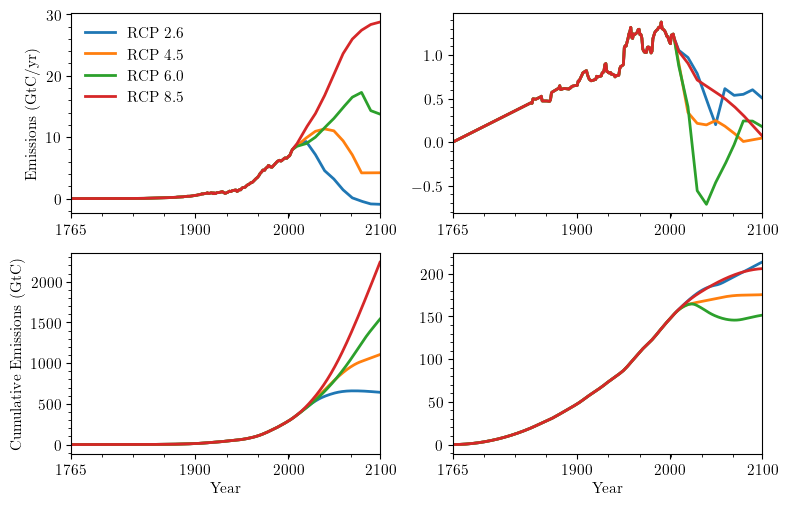

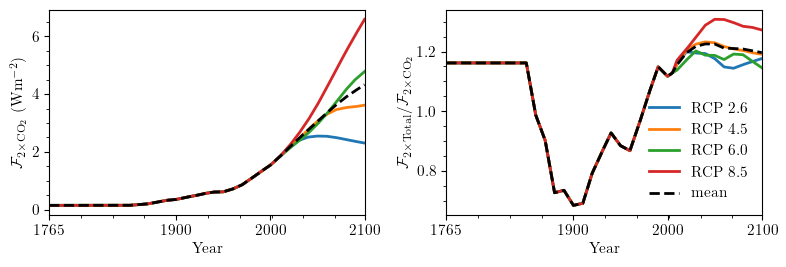

In [18]:
fig_1, axs_1 = make_plot(2,2)
fig_2, axs_2 = make_plot(1,2)
T_start = 1765
T_end   = 2100

scenerio_set_name = ['RCP 2.6', 'RCP 4.5', 'RCP 6.0', 'RCP 8.5']
[reactive_forcing_co2,reactive_forcing_ratio,reactive_forcing_year]=data_load.reactive_forcing(T_start=T_start,T_end=T_end)

for i, scenerio in enumerate(['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']):
    [data_val,data_year] = data_load.cmip_emission(scenerio_name=scenerio,T_start=T_start,T_end=T_end,emission_type='fossil')
    axs_1[0,0].plot(data_year,data_val,label=scenerio_set_name[i],linewidth=2)
    axs_1[1,0].plot(data_year,np.cumsum(data_val),label=scenerio_set_name[i],linewidth=2)
    
    [data_val,data_year] = data_load.cmip_emission(scenerio_name=scenerio,T_start=T_start,T_end=T_end,emission_type='land')
    axs_1[0,1].plot(data_year,data_val,label=scenerio_set_name[i],linewidth=2)
    axs_1[1,1].plot(data_year,np.cumsum(data_val),label=scenerio_set_name[i],linewidth=2)

    axs_2[0,0].plot(data_year,reactive_forcing_co2[scenerio],label=scenerio_set_name[i],linewidth=2,linestyle='-')
    axs_2[0,1].plot(data_year,reactive_forcing_ratio[scenerio],label=scenerio_set_name[i],linewidth=2,linestyle='-')

axs_2[0,0].plot(data_year,reactive_forcing_co2['avg'],label='mean',linewidth=2,color='black',linestyle='--')
axs_2[0,1].plot(data_year,reactive_forcing_ratio['avg'],label='mean',linewidth=2,color='black',linestyle='--')

#axs_2[0,1].axhline(y=np.mean(reactive_forcing_ratio['avg']),color='r',linestyle=':')


axs_2[0,0].minorticks_on()
axs_2[0,1].minorticks_on()
axs_1[0,0].minorticks_on()
axs_1[0,1].minorticks_on() 
axs_1[1,0].minorticks_on() 
axs_1[1,1].minorticks_on() 

axs_1[0,0].legend(frameon=False,loc='upper left',ncol=1)
axs_2[0,1].legend(frameon=False,loc='lower right',ncol=1)

axs_1[0,0].set_ylabel(r'Emissions (GtC/yr)')
#axs[0,1].set_ylabel(r'Landuse-Related Emis. (GtC/yr)')

axs_1[0,0].set_xlim(left=data_year[0],right=data_year[-1])
axs_1[0,0].set_xticks([1765,1900,2000,2100])

axs_1[0,1].set_xlim(left=data_year[0],right=data_year[-1])
axs_1[0,1].set_xticks([1765,1900,2000,2100])

axs_2[0,0].set_xlim(left=data_year[0],right=data_year[-1])
axs_2[0,0].set_xticks([1765,1900,2000,2100])

axs_2[0,1].set_xlim(left=data_year[0],right=data_year[-1])
axs_2[0,1].set_xticks([1765,1900,2000,2100])

axs_1[1,0].set_ylabel(r'Cumulative Emissions (GtC)')
#axs[1,1].set_ylabel(r'Cumulative Landuse-Related Emis. (GtC)')
axs_2[0,0].set_ylabel(r'$\mathcal{F}_{2\times\text{CO}_2}$ ($\textrm{W} \textrm{m}^{-2}$)')
axs_2[0,1].set_ylabel(r'$\mathcal{F}_{2\times \text{Total}} / \mathcal{F}_{2\times\text{CO}_2}$')

axs_1[1,0].set_xlabel(r'Year')    
axs_1[1,1].set_xlabel(r'Year')  
axs_2[0,0].set_xlabel(r'Year')    
axs_2[0,1].set_xlabel(r'Year')  

axs_1[1,0].set_xlim(left=data_year[0],right=data_year[-1])
axs_1[1,0].set_xticks([1765,1900,2000,2100])

axs_1[1,1].set_xlim(left=data_year[0],right=data_year[-1])
axs_1[1,1].set_xticks([1765,1900,2000,2100])

fig_1.savefig('fig/simulations_RCP.png',dpi=300) 
fig_2.savefig('fig/simulations_RF.png',dpi=300) 

# integrate to current conditions for Econ Model


In [13]:
#Load model results
_results['4PR-X'] = copy.copy(_results['4PR'])

# start simulation at 1765
[emis_val_foss,emis_year]  = data_load.cmip_emission(scenerio_name='RCP8.5',T_start=1765,T_end=2100,emission_type='fossil')
[emis_val_land,emis_year ] = data_load.cmip_emission(scenerio_name='RCP8.5',T_start=1765,T_end=2100,emission_type='land')

m_at_current = 2.12*399.4

for model_inx,model_name in enumerate(_results.keys()): 
    model = _results[model_name]['model'] 
    info= model()

    A    = _results[model_name]['A']
    m_eq = _results[model_name]['m_eq']
    a    = _results[model_name]['a']

    m_eq_update = copy.copy(m_eq)
                
    m_sim = []
    m_sim.append(m_eq)
                    
    e = np.zeros(len(m_eq))
 
    t = 0
    while m_sim[-1][0]< m_at_current:

        if 'X' in model_name:
            e[0]  = emis_val_foss[t]
                        
            m_eq_update[-1] -= emis_val_land[t]
            [A,_,_  ] = model(a,m_eq_update)
        else:
            e[0]=emis_val_foss[t]

        m_sim +=[ A@m_sim[-1] +m_sim[-1] +  e ]
        e  = e * 0.0
        t +=1

    m_sim=np.array(m_sim).T

    _results[model_name]['m_ini']         =  np.round(m_sim[:,-1] ,1)  
    _results[model_name]['t_ini']     =  1765+t   
    _results[model_name]['t_ini_inx'] = t
    _results[model_name]['A_ini']     = A
    _results[model_name]['m_eq_ini']  = np.round(m_eq_update)
    
operations.tabulate(results=_results,vars=['m_ini','t_ini','t_ini_inx','m_eq_ini','m_eq'])

results_sim = copy.deepcopy(_results)

# open a file, where you ant to store the data
with open('result/sim_'+_conditions+'.pkl', 'wb') as handle:
    pickle.dump(results_sim, handle, protocol=pickle.HIGHEST_PROTOCOL)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                  Table                                                                                  |
+-------+----------------+------------------------+-----------------------------------+-------+-----------+-------------------------------+-------------------------------+
| model | benchmark_name |          rho           |               m_ini               | t_ini | t_ini_inx |            m_eq_ini           |              m_eq             |
+-------+----------------+------------------------+-----------------------------------+-------+-----------+-------------------------------+-------------------------------+
|  3SR  |      MMM       | [0.01   0.0001 0.    ] |       [ 848.1  965.1 1357.9]      |  2027 |    262    |      [ 589.  752. 1289.]      | 

# Pulse 100 GTC

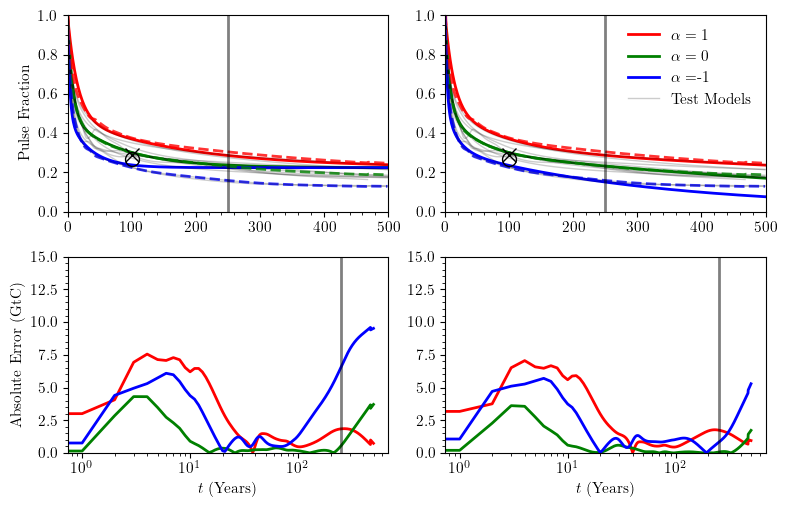

In [14]:
def plot_fit(results,conditions,mode_name_set = ['3SR','4PR']):

    if conditions == 'PI':
        benchmark_list = ['NCAR','BERN3D','BERN25D','CLIMBER2','DCESS','GENIE','LOVECLIM','MESMO','UVIC29','BERNSAR','MMM','MMMU','MMMD']
    
    elif conditions == 'PD':
        benchmark_list = ['NCAR','HADGEM2','MPIESM','BERN3DR','BERN3DE','BERN25D','CLIMBER2','DCESS','GENIE','LOVECLIM','MESMO','UVIC29','ACC2','BERNSAR','MAGICC6','TOTEM2','MMM','MMMU','MMMD']
    else:
        raise NameError('Invalid _conditions')

    T              = 500
    T_sim          = T

    M_sim_set   = {}
    M_pulse_set = []

    fig, axs = make_plot(2,2)
    for model_inx,model_name in enumerate(['3SR','4PR']):   
        model = results[model_name]['model']
        info  = model()
        A     = results[model_name]['A']
        a     = results[model_name]['a']
        m_eq  = results[model_name]['m_eq']
        c     = results[model_name]['c']

        [data_pulse_mmmmu,_] = data_load.pulse_fraction(test_type='MMMU',T=T,conditions=conditions)
        data_pulse_mmmmu    *= 100
        
        [data_pulse_mmmm,_]  = data_load.pulse_fraction(test_type='MMM',T=T,conditions=conditions)
        data_pulse_mmmm     *= 100
        
        [data_pulse_mmmmd,_] = data_load.pulse_fraction(test_type='MMMD',T=T,conditions=conditions)
        data_pulse_mmmmd    *= 100

        M_pulse_set.append(data_pulse_mmmmu)
        M_pulse_set.append(data_pulse_mmmm)
        M_pulse_set.append(data_pulse_mmmmd)

        m0 = np.zeros(A.shape[0]) 
        m0[0] += 100

        [m_mmmu,_,_] = operations.simulate_new(A=(A*c[0]) ,m0=m0,T=T_sim)
        [m_mmm ,_,_] = operations.simulate_new(A=(A*c[1]) ,m0=m0,T=T_sim)
        [m_mmmd,_,_] = operations.simulate_new(A=(A*c[2]) ,m0=m0,T=T_sim)

        M_sim_set[model_name] = []
        M_sim_set[model_name].append(m_mmmu)
        M_sim_set[model_name].append(m_mmm)
        M_sim_set[model_name].append(m_mmmd)

        #label = model_name + r'$(\alpha=1)$'
        label = r'$\alpha=1$'
        axs[0,model_inx].plot(M_sim_set[model_name][0][0,:]/M_sim_set[model_name][0][0,0] ,linewidth=2,alpha=1,label=label,color='red')
        axs[1,model_inx].semilogx((np.abs( M_sim_set[model_name][0][0,0:T]-M_pulse_set[0])),linewidth=2,alpha=1,label=label,color='red')

        #label = model_name + r'$(\alpha=0)$'
        label = r'$\alpha=0$'
        axs[0,model_inx].plot(M_sim_set[model_name][1][0,:]/M_sim_set[model_name][1][0,0],linewidth=2,alpha=1,label=label,color='green')
        axs[1,model_inx].semilogx((np.abs( M_sim_set[model_name][1][0,0:T]-M_pulse_set[1])),linewidth=2,alpha=1,label=label,color='green')

        #label = model_name + r'$(\alpha=-1)$'
        label = r'$\alpha=$-$1$'
        axs[0,model_inx].plot( M_sim_set[model_name][2][0,:]/M_sim_set[model_name][2][0,0],linewidth=2,alpha=1,label=label,color='blue')
        axs[1,model_inx].semilogx((np.abs( M_sim_set[model_name][2][0,0:T]-M_pulse_set[2])),linewidth=2,alpha=1,label=label,color='blue')
        
        for i,benchmark_i in enumerate(benchmark_list):
            [d,_] = data_load.pulse_fraction(test_type=benchmark_i,T=T,conditions=conditions)
            d = d * 100 

            if benchmark_i=='MMMU':
                axs[0,model_inx].plot(d/d[0], linewidth=2,alpha=.8,color='red',linestyle='--')
            elif benchmark_i=='MMM':
                axs[0,model_inx].plot(d/d[0], linewidth=2,alpha=.8,color='green',linestyle='--')
            elif benchmark_i=='MMMD':
                axs[0,model_inx].plot(d/d[0], linewidth=2,alpha=.8,color='blue',linestyle='--')
            else:
                axs[0,model_inx].plot(d/d[0],linewidth=1,alpha=.2,color='black')

        axs[0,model_inx].plot(d/d[0],linewidth=1,alpha=.2,color='black',label='Test Models')
        axs[0,model_inx].axvline(250,linewidth=2, color='k', linestyle='-',alpha=0.5)

        axs[0,model_inx].minorticks_on()
        axs[0,model_inx].set_xlim(left=0,right=T)

        axs[1,model_inx].axvline(250,linewidth=2, color='k', linestyle='-',alpha=0.5)
        axs[1,model_inx].minorticks_on()
        axs[1,model_inx].set_ylim(bottom=0,top=15)

        axs[0,model_inx].plot(100,28.829/100,'x',markersize=10, color='black',  label='_A',fillstyle='none')
        axs[0,model_inx].plot(100,26.876/100,'o',markersize=10, color='black', label='_B',fillstyle='none')

    axs[0,0].set_ylim(0,1)
    axs[0,1].set_ylim(0,1)

    axs[0,0].set_ylabel(r'Pulse Fraction')
    axs[1,0].set_ylabel(r'Absolute Error (GtC)')
    axs[-1,0].set_xlabel(r'$t$ (Years)') 
    axs[-1,1].set_xlabel(r'$t$ (Years)') 
    axs[0,-1].legend(loc='upper right' ,frameon=False,ncol=1)  
    fig.savefig('fig/'+conditions+'/simulations_pulse_decay.png',dpi=300) 

plot_fit(results=_results,conditions=_conditions)

# RCP Emission $\to$ Concentrations $\to$ Temprature


/var/folders/d2/9qb3m2t14ts4c5lnwscq22b80000gn/T/ipykernel_92449/2123178156.py:127: RuntimeWarning: Mean of empty slice
  axs_temp[i,j].plot(temp_year,np.nanmean(temp_val,0),linewidth=1,alpha=1  ,color='black' ,linestyle='--',label='CMIP Model Avg.')


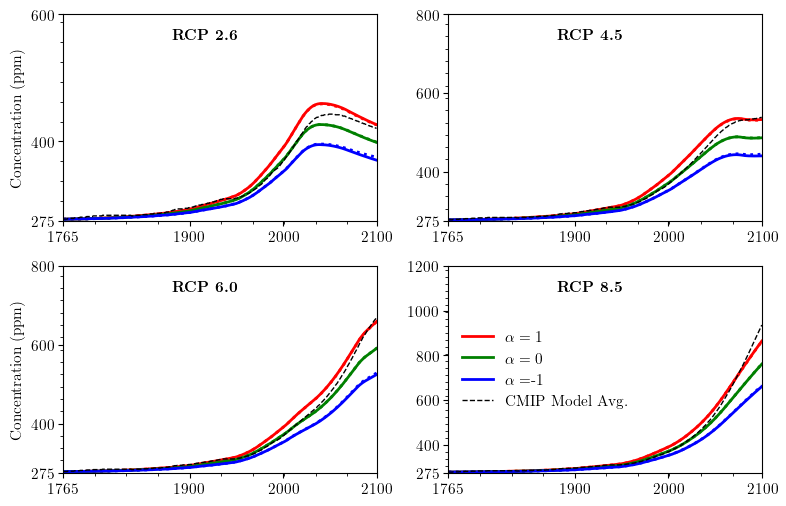

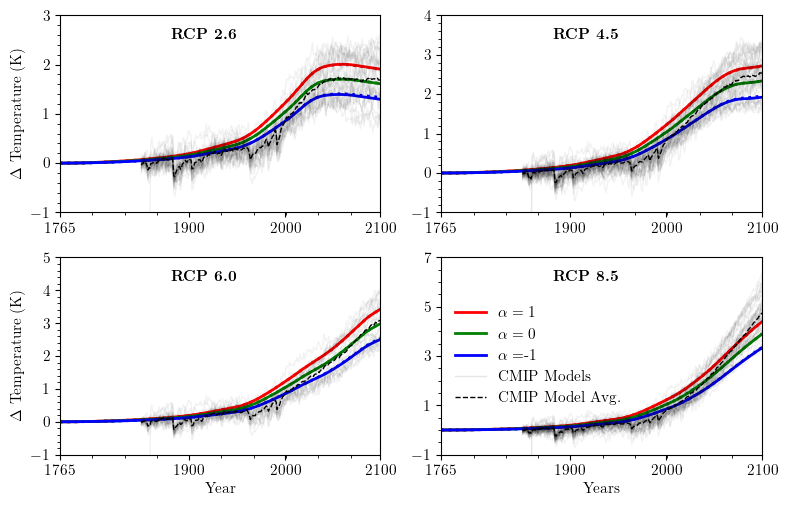

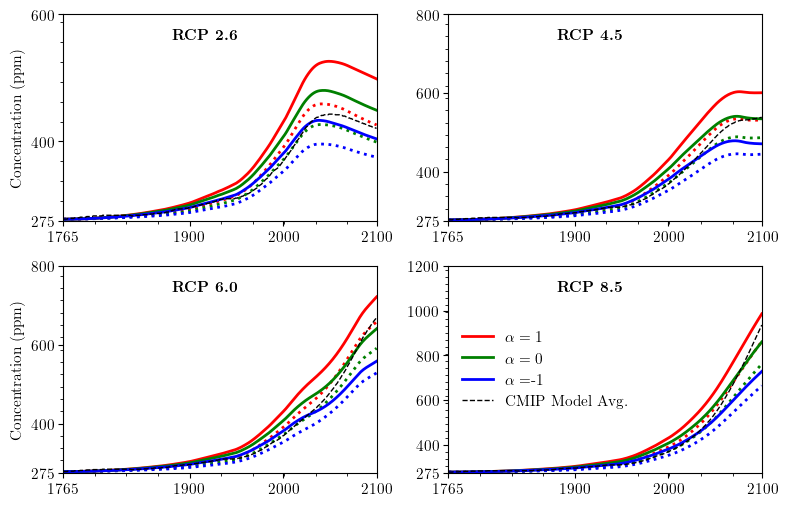

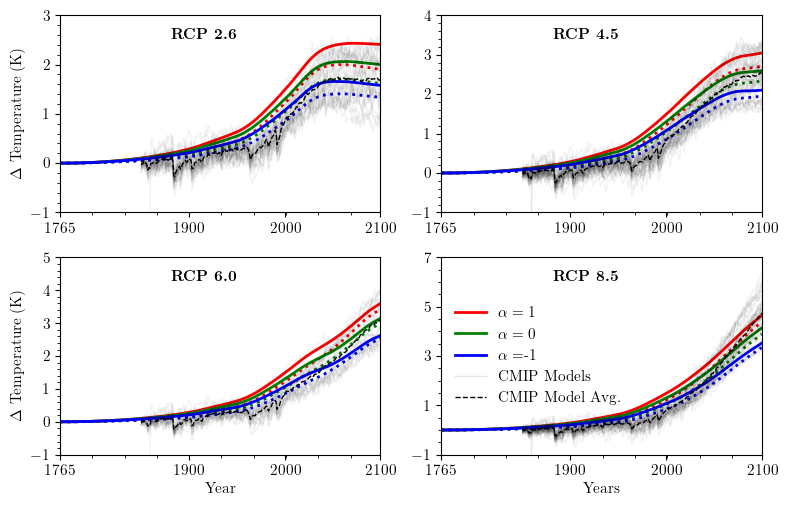

In [15]:
def plot_rcp_conc_temp(results,model_name_set,FX_ratio_set=[1.3,1.3],tag=''):

    T = T_end - T_start + 1
       
    scenerio_set       = ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']
    scenerio_set_name  = [r'$\textbf{RCP 2.6}$', r'$\textbf{RCP 4.5}$', r'$\textbf{RCP 6.0}$', r'$\textbf{RCP 8.5}$']

    fig_conc, axs_conc = make_plot(2,2)
    fig_temp, axs_temp = make_plot(2,2)

    for i in range(2):
        for j in range(2):
            scenerio = scenerio_set[i*2+j]

            [emis_val     ,emis_year] = data_load.cmip_emission(     scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,emission_type='fossil+land')  
            [emis_land_val,emis_year] = data_load.cmip_emission(     scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,emission_type='land')    
            [conc_val     ,conc_year] = data_load.cmip_concentration(scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,concentration_type='CO2')
            [temp_val     ,temp_year] = data_load.cmip_temperature(  scenerio_name=scenerio  ,T_start=T_start,T_end=T_end)

            temp_val = (temp_val.T - temp_val[:,0]).T
            temp_val[np.abs(temp_val)<1e-12]=np.nan

            ###########
            # 3SR Model
            ###########
            if '3SR' in model_name_set:
                model  = results['3SR']['model']
                A      = results['3SR']['A']
                a      = results['3SR']['a']
                m_eq   = np.array(results['3SR']['m_eq'],dtype='f')
                c      = results['3SR']['c']
                m_ini  = m_eq 
                
                e      = np.zeros(shape=(A.shape[0],len(emis_val)))
                e[0,:] = emis_val[0:T]

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[0],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[0])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'_$\alpha=1$',color='red',linestyle=':')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'_$\alpha=1$',color='red',linestyle=':')

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[1],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[0])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'_$\alpha=0$',color='green',linestyle=':')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'_$\alpha=0$',color='green',linestyle=':')

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[2],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[0])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'_$\alpha=$-$1$',color='blue',linestyle=':')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'_$\alpha=$-$1$',color='blue',linestyle=':')

            ###########
            # 4PR Model
            ###########
            if '4PR' in model_name_set:
                model  = results['4PR']['model']
                A      = results['4PR']['A']
                a      = results['4PR']['a']
                m_eq   = np.array(results['4PR']['m_eq'],dtype='f')
                c      = results['4PR']['c']
                m_ini  = m_eq

                e      = np.zeros(shape=(A.shape[0],len(emis_val)))
                e[0,:] = emis_val[0:T]

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[0],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'$\alpha=1$',color='red',linestyle='-')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'$\alpha=1$',color='red',linestyle='-')

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[1],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'$\alpha=0$',color='green',linestyle='-')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'$\alpha=0$',color='green',linestyle='-')

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[2],m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,m_sim[0,:]/2.12, linewidth=2,alpha=1, label=r'$\alpha=$-$1$',color='blue',linestyle='-')
                axs_temp[i,j].plot(temp_year,temp_at        , linewidth=2,alpha=1, label=r'$\alpha=$-$1$',color='blue',linestyle='-')

            ###########
            # 4PR-X Model
            ###########
            if '4PR-X' in model_name_set:
                model  = results['4PR-X']['model']
                A      = results['4PR-X']['A']
                a      = results['4PR-X']['a']
                m_eq   = np.array(results['4PR-X']['m_eq'],dtype='f')
                c      = results['4PR-X']['c']
                m_ini  = m_eq
                
                e       = np.zeros(shape=(A.shape[0],len(emis_val)))
                e[0,:]  = emis_val[0:T]
                #e[-1,:] = -emis_land_val[0:T]

                m_eq_update = np.copy(m_eq)
                A_set       = []

                for t,emis_land_val_t in enumerate(emis_land_val):
                    m_eq_update[-1] -= emis_land_val[t]
                    [A,_,_  ] = model(a,m_eq_update)
                    A_set.append(np.copy(A))

                A_set_u  = []
                A_set_m  = []
                A_set_d  = []

                for A in A_set:
                    A_set_d.append(np.copy(A)*c[0])
                    A_set_m.append(np.copy(A)*c[1])
                    A_set_u.append(np.copy(A)*c[2])

                [m_sim,temp_at,_]  = operations.simulate_dynamic_new(A_set=A_set_d,m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,(m_sim[0,:])/2.12,  linewidth=2,alpha=1, label=r'$\alpha=1$',color='red',linestyle='-') 
                axs_temp[i,j].plot(temp_year,temp_at,            linewidth=2,alpha=1, label=r'$\alpha=1$',color='red',linestyle='-') 
                         
                [m_sim,temp_at,_]  = operations.simulate_dynamic_new(A_set=A_set_m,m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,(m_sim[0,:])/2.12,  linewidth=2,alpha=1, label=r'$\alpha=0$',color='green',linestyle='-') 
                axs_temp[i,j].plot(temp_year,temp_at,            linewidth=2,alpha=1, label=r'$\alpha=0$',color='green',linestyle='-') 
     
                [m_sim,temp_at,_]  = operations.simulate_dynamic_new(A_set=A_set_u,m0=m_ini,T=len(emis_val),e=e,FX_ratio=FX_ratio_set[1])
                axs_conc[i,j].plot(emis_year,(m_sim[0,:])/2.12,  linewidth=2,alpha=1, label=r'$\alpha=$-$1$',color='blue',linestyle='-') 
                axs_temp[i,j].plot(temp_year,temp_at,            linewidth=2,alpha=1, label=r'$\alpha=$-$1$',color='blue',linestyle='-') 

            axs_conc[i,j].text(0.45,.9,scenerio_set_name[i*2+j],horizontalalignment='center', verticalalignment='center', transform=axs_conc[i,j].transAxes)
            axs_temp[i,j].text(0.45,.9,scenerio_set_name[i*2+j],horizontalalignment='center', verticalalignment='center', transform=axs_temp[i,j].transAxes)

            axs_conc[i,j].plot(conc_year,conc_val              ,linewidth=1,alpha=1  ,color='black' ,linestyle='--',label='CMIP Model Avg.')
            
            axs_temp[i,j].plot(temp_year,temp_val.T[:,0]       ,linewidth=1,alpha=.1 ,color='black' ,linestyle='-', label='CMIP Models'    )
            axs_temp[i,j].plot(temp_year,temp_val.T[:,1:]      ,linewidth=1,alpha=.05,color='black' ,linestyle='-', label='_CMIP Models'   )
            
            axs_temp[i,j].plot(temp_year,np.nanmean(temp_val,0),linewidth=1,alpha=1  ,color='black' ,linestyle='--',label='CMIP Model Avg.')

            axs_conc[i,j].set_xlim(left=T_start,right=T_end)
            axs_temp[i,j].set_xlim(left=T_start,right=T_end)

            axs_conc[i,j].set_xticks([T_start,1900,2000,T_end])
            axs_temp[i,j].set_xticks([T_start,1900,2000,T_end])
            
            axs_conc[i,j].minorticks_on() 
            axs_temp[i,j].minorticks_on()

    axs_conc[0,0].set_ylabel(r'Concentration (ppm)')
    axs_conc[-1,0].set_ylabel(r'Concentration (ppm)')
            
    axs_temp[0,0].set_ylabel(r'$\Delta$ Temperature (K)')
    axs_temp[-1,0].set_ylabel(r'$\Delta$ Temperature (K)')

    axs_temp[-1, 0].set_xlabel(r'Year') 
    axs_temp[-1, -1].set_xlabel(r'Years') 
            
    axs_conc[-1,-1].legend(loc='center left' ,frameon=False,ncol=1)
    axs_temp[-1,-1].legend(loc='center left' ,frameon=False,ncol=1)

    axs_conc[0,0].set_ylim(bottom=275,top=600)
    axs_conc[0,0].set_yticks([275,400,600])
    axs_conc[0,1].set_ylim(bottom=275,top=800)
    axs_conc[0,1].set_yticks([275,400,600,800])
    axs_conc[1,0].set_ylim(bottom=275,top=800)
    axs_conc[1,0].set_yticks([275,400,600,800])
    axs_conc[1,1].set_ylim(bottom=275,top=1200)
    axs_conc[1,1].set_yticks([275,400,600,800,1000,1200])

    axs_temp[0,0].set_ylim(bottom=-1,top=3)
    axs_temp[0,0].set_yticks([-1,0,1,2,3])
    axs_temp[0,1].set_ylim(bottom=-1,top=4)
    axs_temp[0,1].set_yticks([-1,0,1,2,3,4])
    axs_temp[1,0].set_ylim(bottom=-1,top=5)
    axs_temp[1,0].set_yticks([-1,0,1,2,3,4,5])
    axs_temp[1,1].set_ylim(bottom=-1,top=7)
    axs_temp[1,1].set_yticks([-1,1,3,5,7])

    fig_conc.savefig('fig/'+_conditions+'/simulations_rcp_conc_'+str(tag)+'.png',dpi=300)
    fig_temp.savefig('fig/'+_conditions+'/simulations_rcp_temp_'+str(tag)+'.png',dpi=300) 
     
[_,rf_ratio,year]=data_load.reactive_forcing(T_start = T_start,T_end = T_end)
plot_rcp_conc_temp(results=_results,model_name_set=['3SR','4PR'],tag='base_both',FX_ratio_set=[1.2,1.2])
plot_rcp_conc_temp(results=_results,model_name_set=['3SR','4PR-X'],tag='base_both_x',FX_ratio_set=[1.2,1.2])

# 4PR RCP Dynamics

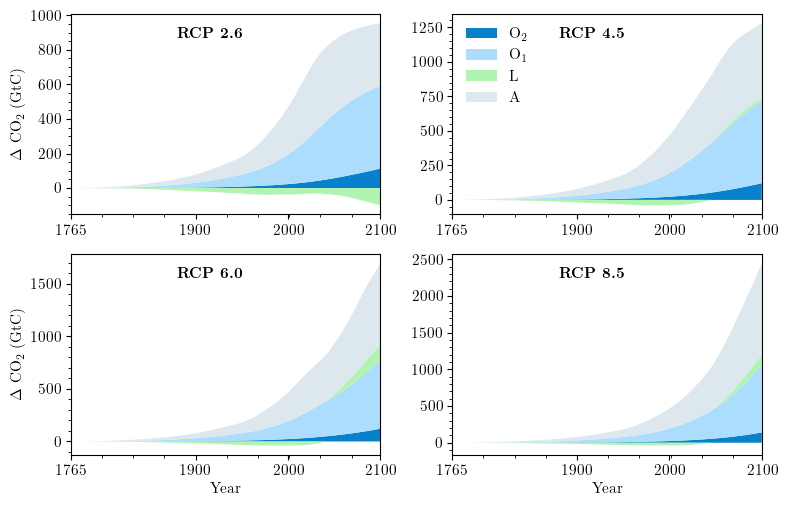

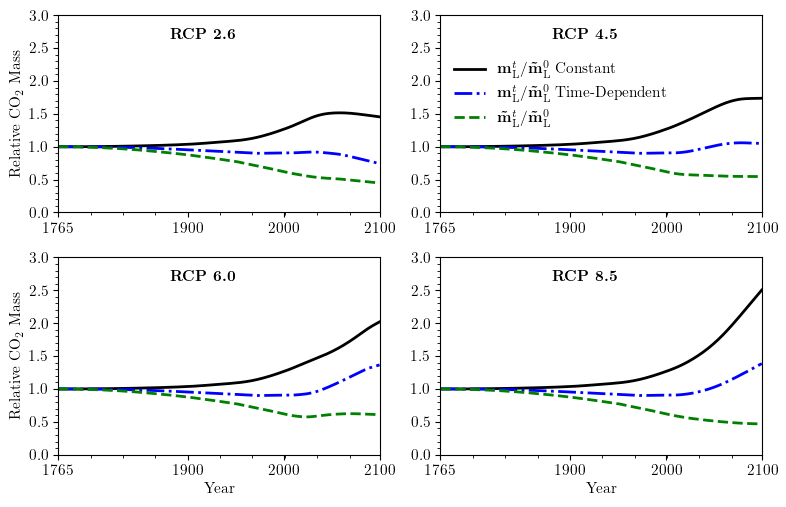

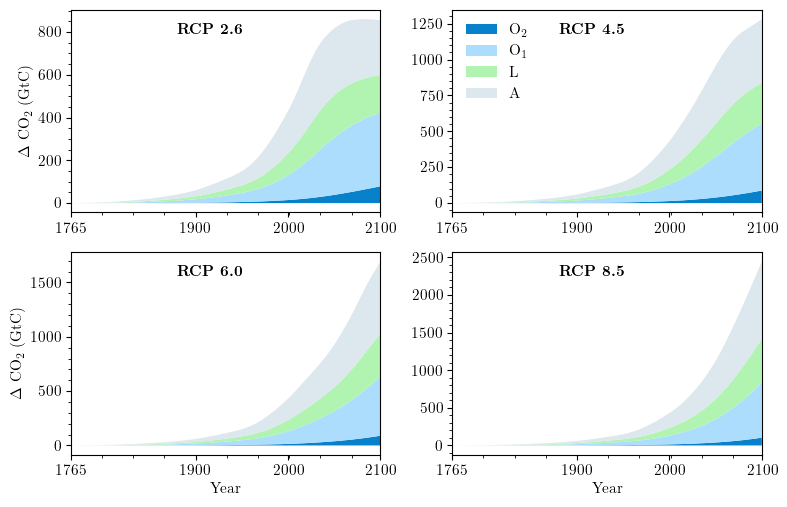

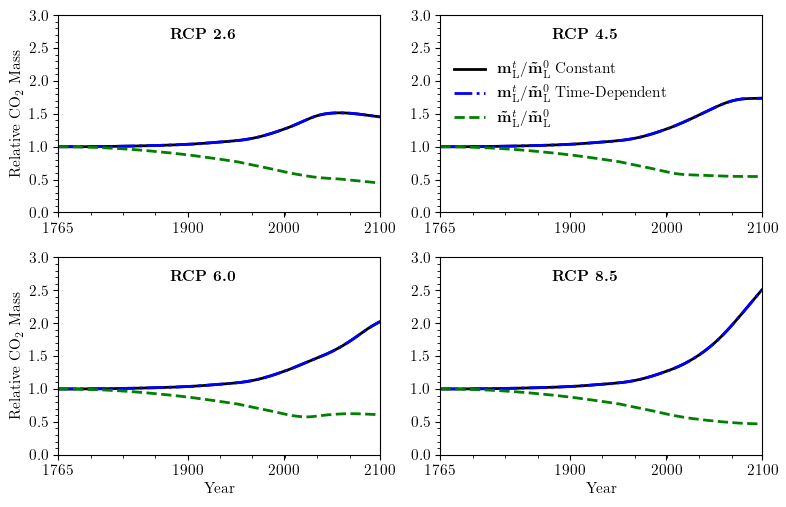

In [16]:

def plot_rcp_conc_comp(results,model_name ='4PR',FX_ratio=1.2,tag=''):
    T = T_end - T_start + 1
 
    color_A  =(0.8667,0.9059,0.9333)
    color_O1 =(0.6743529411764707, 0.8670274509803922, 0.9864313725490196)
    color_O2 =(0.03321568627450988, 0.5048784313725492, 0.7971764705882353)
    color_L  =(0.6946139705882354, 0.9532291666666667, 0.6946139705882354)

    scenerio_set       = ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']
    scenerio_set_name  = [r'$\textbf{RCP 2.6}$', r'$\textbf{RCP 4.5}$', r'$\textbf{RCP 6.0}$', r'$\textbf{RCP 8.5}$']
    fig, axs = make_plot(2,2)

    fig_land, axs_land = make_plot(2,2)

    for i in range(2):
        for j in range(2):
            scenerio = scenerio_set[i*2+j]

            [emis_val     ,emis_year] = data_load.cmip_emission(     scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,emission_type='fossil+land')  
            [emis_land_val,emis_year] = data_load.cmip_emission(     scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,emission_type='land')    
            [conc_val     ,conc_year] = data_load.cmip_concentration(scenerio_name=scenerio  ,T_start=T_start,T_end=T_end,concentration_type='CO2')
            [temp_val     ,temp_year] = data_load.cmip_temperature(  scenerio_name=scenerio  ,T_start=T_start,T_end=T_end)

            temp_val = (temp_val.T - temp_val[:,0]).T

            ###########
            # 3SR Model
            ###########
            if '3SR' in model_name:
                model  = results['3SR']['model']
                A      = results['3SR']['A']
                a      = results['3SR']['a']
                m_eq   = np.array(results['3SR']['m_eq'],dtype='f')
                c      = results['3SR']['c']
                
                e      = np.zeros(shape=(A.shape[0],len(emis_val)))
                e[0,:] = emis_val[0:T]

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[0],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                m_sim_3sr_1   = m_sim
                temp_at_3sr_1 = temp_at

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[1],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                m_sim_3sr_2   = m_sim
                temp_at_3sr_2 = temp_at

                [m_sim,temp_at,temp_o]  = operations.simulate_new(A=A*c[2],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                m_sim_3sr_3   = m_sim
                temp_at_3sr_3 = temp_at

                D = copy.copy(m_sim_3sr_2)

                for ii in range(0,D.shape[0]):
                    D[ii,:]=D[ii,:]-m_eq[ii]

                axs[i,j].stackplot(range(T_start, T_end+1),D[2,:],D[1,:],D[0,:], colors=[color_O2,color_O1,color_A])
                axs[i,j].set_xlim(left=T_start,right=T_end)
                axs[i,j].text(0.45,.9,scenerio_set_name[i*2+j],horizontalalignment='center', verticalalignment='center', transform=axs[i,j].transAxes)
                axs[i,j].minorticks_on() 
 
            ###########
            # 4PR and 4PR-X Model
            ###########
            if '4PR' in model_name:
                model  = results['4PR']['model']
                A      = results['4PR']['A']
                a      = results['4PR']['a']
                m_eq   = np.array(results['4PR']['m_eq'],dtype='f')
                c      = results['4PR']['c']
                
                e       = np.zeros(shape=(A.shape[0],len(emis_val)))
                e[0,:]  = emis_val[0:T]


                if '-X' in model_name:

                    m_eq_update = np.copy(m_eq)
                    A_set       = []
                    A_set.append(np.copy(A))


                    for t,emis_land_val_t in enumerate(emis_land_val):
                        m_eq_update[-1] -= emis_land_val[t] 
                        [A_temp,_,_  ]        = model(a,m_eq_update)
                        A_set.append(np.copy(A_temp))

                    A_set_u  = np.copy(np.copy(A_set)*c[0])
                    A_set_m  = np.copy(np.copy(A_set)*c[1])
                    A_set_d  = np.copy(np.copy(A_set)*c[2])

                    [m_sim_4pr_1,temp_at_4pr_1,_]  = operations.simulate_dynamic_new(A_set=A_set_d,m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                    [m_sim_4pr_2,temp_at_4pr_2,_]  = operations.simulate_dynamic_new(A_set=A_set_m,m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                    [m_sim_4pr_3,temp_at_4pr_3,_]  = operations.simulate_dynamic_new(A_set=A_set_u,m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)

                else:
                    [m_sim_4pr_1,temp_at_4pr_1,_]  = operations.simulate_new(A=A*c[0],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                    [m_sim_4pr_2,temp_at_4pr_2,_]  = operations.simulate_new(A=A*c[1],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)
                    [m_sim_4pr_3,temp_at_4pr_3,_]  = operations.simulate_new(A=A*c[2],m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)


                D = copy.copy(m_sim_4pr_2)

                for ii in range(0,D.shape[0]):
                    D[ii,:]=D[ii,:]-m_eq[ii]

                D_neg = copy.copy(D)
                D_pos = copy.copy(D)

                D_pos[D_pos < 0] = 0
                D_neg[D_neg > 0] = 0

                axs[i,j].stackplot(range(T_start, T_end+1),D_pos[2,:],D_pos[1,:],D_pos[3,:],D_pos[0,:], colors=[color_O2,color_O1,color_L,color_A])
                axs[i,j].stackplot(range(T_start, T_end+1),D_neg[2,:],D_neg[1,:],D_neg[3,:],D_neg[0,:], colors=[color_O2,color_O1,color_L,color_A])
            
                axs[i,j].minorticks_on() 
                axs[i,j].text(0.45,.9,scenerio_set_name[i*2+j],horizontalalignment='center', verticalalignment='center', transform=axs[i,j].transAxes)
     
                [m_sim_4pr_2_base,_,_]  = operations.simulate_new(A=A,m0=m_eq,T=len(emis_val),e=e,FX_ratio=FX_ratio)


                axs_land[i,j].plot(range(T_start, T_end+1), m_sim_4pr_2_base[-1,:]/m_sim_4pr_2_base[-1,0],linewidth=2,alpha=1, linestyle='-',color='black') 
                axs_land[i,j].plot(range(T_start, T_end+1), m_sim_4pr_2[-1,:]/m_sim_4pr_2[-1,0],linewidth=2,alpha=1, linestyle='dashdot',color='blue') 
                temp = m_eq[-1]-np.cumsum(emis_land_val)
                axs_land[i,j].plot(range(T_start, T_end+1),temp/temp[0],linewidth=2,alpha=1, linestyle='--',color='green')                
                axs_land[i,j].text(0.45,.9,scenerio_set_name[i*2+j],horizontalalignment='center', verticalalignment='center', transform=axs_land[i,j].transAxes)
                axs_land[i,j].minorticks_on() 
                axs_land[i,j].set_xticks([1765,1900,2000,2100])

    axs[0,0].set_xlim(left=T_start,right=T_end)
    axs[0,0].set_xticks([T_start,1900,2000,T_end])
    axs[0,0].set_ylabel(r'$\Delta$ CO$_2$ (GtC)')

    axs[0,1].set_xlim(left=T_start,right=T_end)
    axs[0,1].set_xticks([T_start,1900,2000,T_end])
    axs[0,1].legend([r'$\textrm{O}_2$',r'$\textrm{O}_1$',r'$\textrm{L}$',r'$\textrm{A}$'],frameon=False,loc='upper left',ncol=1)

    axs[1,0].set_xlim(left=T_start,right=T_end)
    axs[1,0].set_xticks([T_start,1900,2000,T_end])
    axs[1,0].set_ylabel(r'$\Delta$ CO$_2$ (GtC)')
    axs[1,0].set_xlabel(r'Year') 

    axs[1,1].set_xlim(left=T_start,right=T_end)
    axs[1,1].set_xticks([T_start,1900,2000,T_end])
    axs[1,1].set_xlabel(r'Year') 

    axs_land[0,0].set_xlim(left=T_start,right=T_end)
    axs_land[0,0].set_ylim(bottom=0.0,top=3)
    axs_land[0,0].set_ylabel(r'Relative CO$_2$ Mass')

    axs_land[0,1].set_xlim(left=T_start,right=T_end)
    axs_land[0,1].set_ylim(bottom=0.0,top=3)
    axs_land[0,1].legend(
        [r'$\mathbf{m}^t_{\text{L}}/\mathbf{\tilde{m}}^0_{\text{L}}$ Constant',
        r'$\mathbf{m}^t_{\text{L}}/\mathbf{\tilde{m}}^0_{\text{L}}$ Time-Dependent',
        r'$\mathbf{\tilde{m}}^t_{\text{L}}/\mathbf{\tilde{m}}^0_{\text{L}}$'],
        frameon=False,loc='center left',bbox_to_anchor=(0.0, 0.6),ncol=1)

    axs_land[1,0].set_xlim(left=T_start,right=T_end)
    axs_land[1,0].set_ylim(bottom=0.0,top=3)
    axs_land[1,0].set_ylabel(r'Relative CO$_2$ Mass')
    axs_land[1,0].set_xlabel(r'Year') 

    axs_land[1,1].set_xlim(left=T_start,right=T_end)
    axs_land[1,1].set_ylim(bottom=0.0,top=3)
    axs_land[1,1].set_xlabel(r'Year') 

    fig.savefig('fig/'+_conditions+'/simulations_plot_rcp_conc_comp_'+str(tag)+'.png',dpi=300) 
    fig_land.savefig('fig/'+_conditions+'/simulations_plot_rcp_conc_land_change_'+str(tag)+'.png',dpi=300) 

plot_rcp_conc_comp(results=_results,model_name='4PR-X',tag='base_4PR_x',FX_ratio=1.2)
plot_rcp_conc_comp(results=_results,model_name='4PR',tag='base_4PR',FX_ratio=1.2)

Mc dog

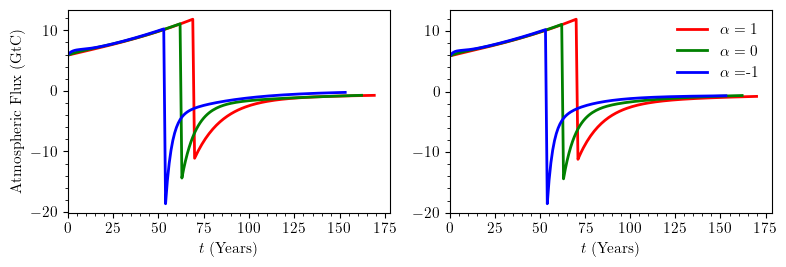

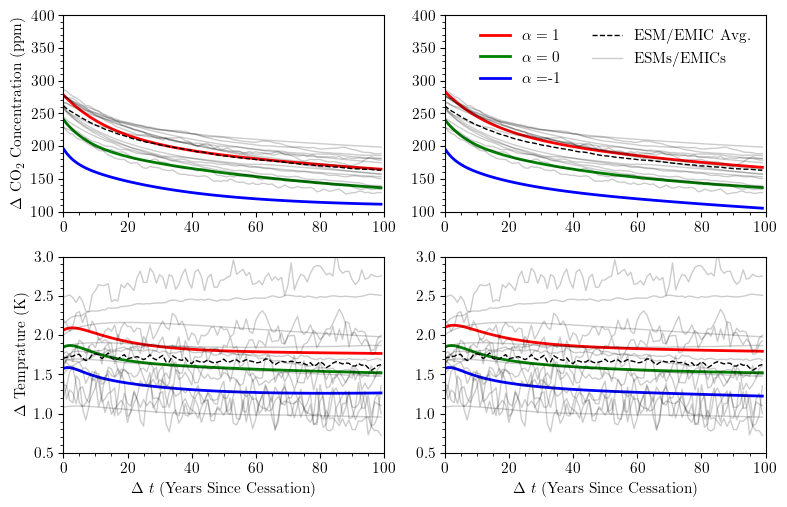

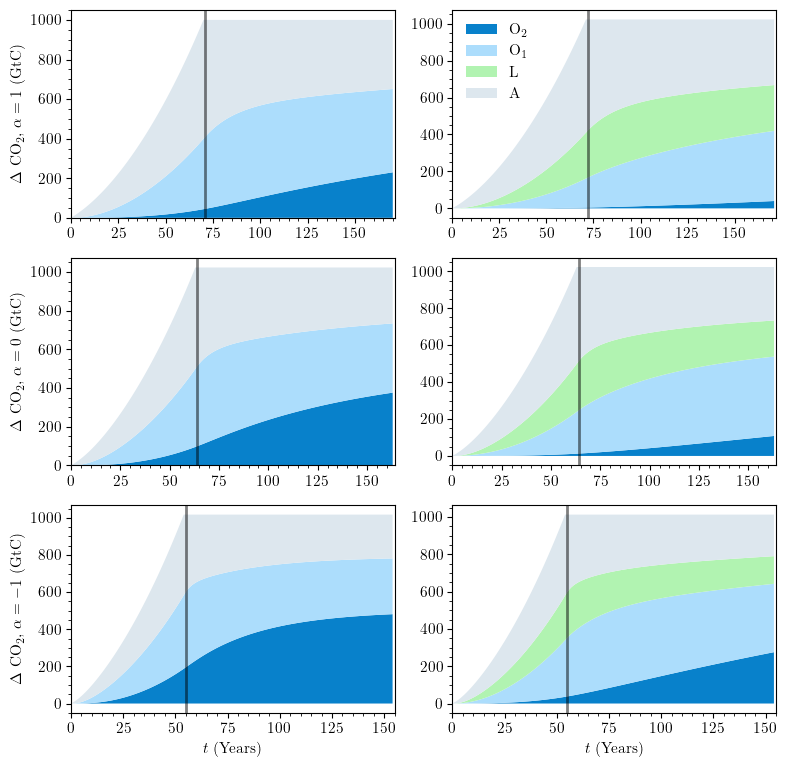

In [17]:
def plot_mcdoogle(results,FX_ratio):
    color_A  =(0.8667,0.9059,0.9333)
    color_O1 =(0.6743529411764707, 0.8670274509803922, 0.9864313725490196)
    color_O2 =(0.03321568627450988, 0.5048784313725492, 0.7971764705882353)
    color_L  =(0.6946139705882354, 0.9532291666666667, 0.6946139705882354)

    calib_data_3sr = results['3SR'] 
    calib_data_4pr = results['4PR'] 

    T_mac_dougall        = 100
    m_sim_set            = [0]*3
    temp_sim_set         = [0]*3
    T_stop_emissions_set = [0]*3

    ###############
    ## 3SR
    ###############
    T_stop_emissions_set_3sr = []
    m_sim_set_3sr            = []
    temp_at_sim_set_3sr      = []
    temp_o_sim_set_3sr       = []

    c_set     = calib_data_3sr['c'] 
    A_base    = calib_data_3sr['A']
    m_eq      = calib_data_3sr['m_eq']

    for c in c_set:
        A        = A_base*c
        m_sim    = [m_eq]
        emis_val = [0]

        # produce emission such that we increase CO2 by 1% per year and stop when we have 1000 GTC carbon
        while np.sum(emis_val) < 1000:
            # m_new = Am + m + e
            # 1.01  = m_new/m = (Am + m)/m + e/m = A+1+e/m
            # e/m   = (1.01 - (Am - m)/m) =  0.1 - A
            # e     = (1.01*m - Am - m) = (m*(1.01-1) - Am)= (0.01*m-Am)
            m  = np.copy(m_sim[-1])
            Am = A@m

            # compute emissions to get 1% increase
            emis_val += [1.0/100.0 * m[0] - Am[0]]
            m[0]     += emis_val[-1]
            m_sim    += [Am + m]

        T_stop_emissions_set_3sr.append(len(emis_val))

        emis_val = emis_val + [0]*T_mac_dougall

        e = np.zeros(shape=(A.shape[0],len(emis_val)))
        e[0,:] = emis_val

        [m_sim,temp_at,temp_o] = operations.simulate_new(A=A, m0=m_eq, T=e.shape[1], e=e,FX_ratio=FX_ratio)

        m_sim_set_3sr.append(m_sim)
        temp_at_sim_set_3sr.append(temp_at-temp_at[0])
        temp_o_sim_set_3sr.append(temp_o-temp_o[0])

    ###############
    ## 4PR
    ###############
    T_stop_emissions_set_4pr = []
    m_sim_set_4pr            = []
    temp_at_sim_set_4pr      = []
    temp_o_sim_set_4pr       = []

    c_set     = calib_data_4pr['c'] #
    A_base    = calib_data_4pr['A']
    m_eq      = calib_data_4pr['m_eq']

    for c in c_set:
        A        = A_base*c
        m_sim    = [m_eq]
        emis_val = [0]

        # produce emission such that we increase CO2 by 1% per year and stop when we have 1000 GTC carbon
        while np.sum(emis_val) < 1000:
            # m_new = Am + m + e
            # 1.01  = m_new/m = (Am + m)/m + e/m
            # e/m   = (1.01 - (Am - m)/m)
            # e     = (1.01*m - Am - m) = (m*(1.01-1) - Am)= (0.01*m-Am)
            m  = np.copy(m_sim[-1])
            Am = A@m

            # compute emissions to get 1% increase
            emis_val += [1.0/100.0 * m[0] - Am[0]]
            m[0]     += emis_val[-1]
            m_sim    += [Am + m]

        T_stop_emissions_set_4pr.append(len(emis_val))

        emis_val = emis_val + [0] * T_mac_dougall

        e = np.zeros(shape=(A.shape[0],len(emis_val)))
        e[0,:] = emis_val

        [m_sim,temp_at,temp_o] = operations.simulate_new(A=A, m0=m_eq, T=e.shape[1], e=e,FX_ratio=FX_ratio)

        m_sim_set_4pr.append(m_sim)
        temp_at_sim_set_4pr.append(temp_at-temp_at[0])
        temp_o_sim_set_4pr.append(temp_o-temp_o[0])

    T_stop_emissions_set = [T_stop_emissions_set_3sr,T_stop_emissions_set_4pr]
    m_sim_set            = [m_sim_set_3sr,m_sim_set_4pr]
    temp_at_sim_set      = [temp_at_sim_set_3sr,temp_at_sim_set_4pr]
    temp_o_sim_set       = [temp_o_sim_set_3sr,temp_o_sim_set_4pr]

    #######################
    # Plot Delta ATM
    #######################
    fig, axs = make_plot(1,2)
    for i in range(2):
        data = np.copy(m_sim_set[i][0])
        data = np.diff(data[0, :])
        axs[0, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=1$', color='red')
            
        data = np.copy(m_sim_set[i][1])
        data = np.diff(data[0, :])
        axs[0, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=0$', color='green')
            
        data = np.copy(m_sim_set[i][2])
        data = np.diff(data[0, :])
        axs[0, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=$-$1$', color='blue')
        
        axs[0, i].set_xticks(np.arange(0, 200, 25))
        axs[0, i].set_xlim(left=0)
        #axs[0, i].set_ylim(-20, 20)
        axs[0, i].minorticks_on()
        axs[0, i].set_xlabel(r'$t$ (Years)') 

    axs[0, -1].legend(frameon=False, loc='upper right', ncol=1)
    axs[0, 0].set_ylabel(r'Atmospheric Flux (GtC)')
    fig.savefig('fig/'+_conditions+'/simulate_macdougall_flux.png', dpi=300)

    #######################
    # Plot Concentration 
    #######################
    [data_zec,t_cess,modle_list] = data_load.zec_1000_cess(T_end=T_mac_dougall,var='co2')
    data_zec_mean = np.mean(data_zec,0)

    fig, axs = make_plot(2,2)
    for i in range(2):
        data = np.copy(m_sim_set[i][0])
        data = data[0,T_stop_emissions_set[i][0]:] - 589 #- m_sim_set[i][1][0,T_stop_emissions_set[i][1]]
        axs[0, i].plot(data/2.12, linewidth=2, alpha=1,label=r'$\alpha=1$', color='red')
            
        data = np.copy(m_sim_set[i][1])
        data = data[0,T_stop_emissions_set[i][1]:] - 589#- m_sim_set[i][1][0,T_stop_emissions_set[i][1]]
        axs[0, i].plot(data/2.12 , linewidth=2, alpha=1,label=r'$\alpha=0$', color='green')
            
        data = np.copy(m_sim_set[i][2])
        data = data[0,T_stop_emissions_set[i][2]:] - 589#- m_sim_set[i][1][0,T_stop_emissions_set[i][1]]
        axs[0, i].plot(data/2.12, linewidth=2, alpha=1,label=r'$\alpha=$-$1$', color='blue')

        axs[0, i].plot(data_zec_mean, linewidth=1, alpha=1, color='black',linestyle='--',label='ESM/EMIC Avg.')

        axs[0, i].set_ylim(100,400)
        axs[0,i].set_xlim(0, T_mac_dougall)
        axs[0,i].minorticks_on()
        #axs[0,i].legend(frameon=False, loc='upper right', ncol=1)
        #axs[0,i].set_xlabel(r'$\Delta$ $t$ (Years Since Cessation)') 

        axs[0,i].plot(data_zec[0],linewidth=1,alpha=.2,color='black',label='ESMs/EMICs')

        for inx in range(1,len(data_zec)):
            axs[0,i].plot(data_zec[inx],linewidth=1,alpha=.2,color='black')

    axs[0,0].set_ylabel(r'$\Delta$ CO$_2$ Concentration (ppm)')
    #fig.savefig('doc/fig/simulate_macdougall_2.png', dpi=300)

    #######################
    # Plot Temp
    #######################
    #[data_zec,t_cess,modle_list] = data_load.zec_1000_cess(T_end=T_mac_dougall,var='tas',model_name_set=[ 'CanESM5','GFDL-ESM2M','CESM', 'ACCESS','MIROC-ES2L', 'UKESM1', 'MPIESM','NorESM2','CNRM-ESM2-1'])
    #[data_zec,t_cess,modle_list] = data_load.zec_1000_cess(T_end=T_mac_dougall,var='tas',model_name_set=[ 'UVIC_ESCM','LOVECLIM','MIROC-lite', 'DCESS','CLIMBER2', 'MESM', 'PLASIM-GENIE','Bern','IAPRAS'])
    [data_zec,t_cess,modle_list] = data_load.zec_1000_cess(T_end=T_mac_dougall,var='tas')
    data_zec_mean = np.mean(data_zec,0)
    for i in range(2):

        data = np.copy(temp_at_sim_set[i][0])
        data = data[T_stop_emissions_set[i][0]:] #-  temp_at_sim_set[i][1][T_stop_emissions_set[i][1]]
        axs[1, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=1$', color='red')
            
        data = np.copy(temp_at_sim_set[i][1])
        data = data[T_stop_emissions_set[i][1]:] #- temp_at_sim_set[i][1][T_stop_emissions_set[i][1]]
        axs[1, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=0$', color='green')
            
        data = np.copy(temp_at_sim_set[i][2])
        data = data[T_stop_emissions_set[i][2]:] #- temp_at_sim_set[i][1][T_stop_emissions_set[i][1]]
        axs[1, i].plot(data, linewidth=2, alpha=1,label=r'$\alpha=$-$1$', color='blue')

        axs[1, i].plot(data_zec_mean, linewidth=1, alpha=1, color='black',linestyle='--')

        for inx in range(0,len(data_zec)):
            axs[1,i].plot(data_zec[inx],linewidth=1,alpha=.2,color='black')

        axs[1, i].set_ylim( 0.5,3)
        axs[1, i].set_xlim(0, T_mac_dougall)
        axs[1, i].minorticks_on()
        axs[1, i].set_xlabel(r'$\Delta$ $t$ (Years Since Cessation)') 

    axs[0,-1].legend(frameon=False,loc='upper right',ncol=2)
    axs[1, 0].set_ylabel(r'$\Delta$ Temprature (K)')
    fig.savefig('fig/'+_conditions+'/simulate_macdougall_conc_temp.png', dpi=300)

    fig, axs = make_plot(3,2)
    for i in range(0,2):
        for inx in range(0,3):
            data = np.copy(m_sim_set[i][inx])
            p, T = data.shape

            for j in range(0, p):
                data[j, :] = data[j, :] - m_sim_set[i][inx][j, 0]

            if i==0: # 3SR 
                axs[inx,i].stackplot(range(0, T),data[2,:],data[1,:],data[0,:], colors=[color_O2,color_O1,color_A])

            if i==1: # 4PR 
                axs[inx,i].stackplot(range(0, T),data[2,:],data[1,:],data[3,:],data[0,:], colors=[color_O2,color_O1,color_L,color_A])

            axs[inx,i].axvline(x=T_stop_emissions_set[i][inx], color='black',alpha=0.5, linewidth=2)

            axs[inx,i].minorticks_on()
            axs[inx,i].set_xlim(left=0,right=T)
            axs[inx,0].set_ylabel(r'$\Delta$ CO$_2$, $\alpha='+str(1-inx)+'$ (GtC)')

    axs[0,-1].legend([r'$\textrm{O}_2$',r'$\textrm{O}_1$',r'$\textrm{L}$',r'$\textrm{A}$'],frameon=False,loc='upper left',ncol=1)

    axs[-1,0].set_xlabel(r'$t$ (Years)') 
    axs[-1,1].set_xlabel(r'$t$ (Years)') 

    fig.savefig('fig/'+_conditions+'/simulate_macdougall_absorbtion.png', dpi=300)
  
plot_mcdoogle(results=_results,FX_ratio=1.0)